In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#ESTO REALIZA UNA LIMPIEZA DE DATOS

In [7]:
url="Libro1.csv"
 
archi =pd.read_csv(url)
print(archi.columns)
archi['VALOR EN PESOS']= archi['VALOR EN PESOS'].replace("-", np.nan) 
archi = archi.dropna(subset=['VALOR EN PESOS'])

print(archi)

Index(['CODIGO ENTIDAD', 'NOMBRE DE ENTIDAD', 'NIT', 'SIGLA', 'CODRENGLON',
       'NOMBRE CUENTA', 'VALOR EN PESOS'],
      dtype='object')
      CODIGO ENTIDAD                      NOMBRE DE ENTIDAD            NIT  \
0                  6  FONDO DE EMPLEADOS DE ORACLE COLOMBIA  800-210-714-3   
1                  6  FONDO DE EMPLEADOS DE ORACLE COLOMBIA  800-210-714-3   
2                  6  FONDO DE EMPLEADOS DE ORACLE COLOMBIA  800-210-714-3   
3                  6  FONDO DE EMPLEADOS DE ORACLE COLOMBIA  800-210-714-3   
4                  6  FONDO DE EMPLEADOS DE ORACLE COLOMBIA  800-210-714-3   
...              ...                                    ...            ...   
4999              77          FONDO DE EMPLEADOS EXXONMOBIL  860-007-345-8   
5000              77          FONDO DE EMPLEADOS EXXONMOBIL  860-007-345-8   
5001              77          FONDO DE EMPLEADOS EXXONMOBIL  860-007-345-8   
5002              77          FONDO DE EMPLEADOS EXXONMOBIL  860-007-345-8   
5

In [ ]:
#ESTA CREA UNA GRAFICA DE AREAS SOBRE Mostrar un gráfico de líneas con área sombreada que representa el valor total en pesos por NIT, ordenado de mayor a menor, mostrando los 20 NITs con mayor valor.

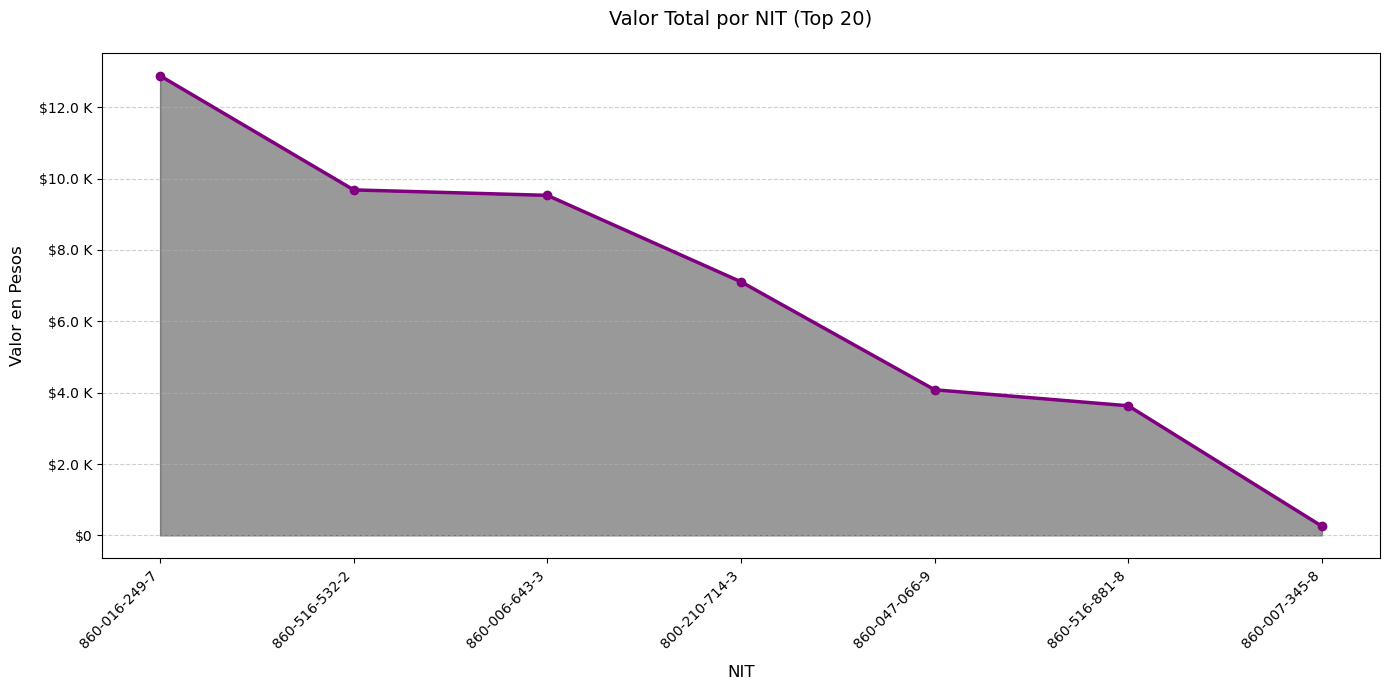

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

try:
    df = pd.read_csv("Libro1.csv", encoding='utf-8', thousands='.', decimal=',')
except:
    df = pd.read_csv("Libro1.csv", encoding='latin1', thousands=',', decimal='.')

df.columns = df.columns.str.strip()
df.rename(columns={"VALOR EN PESOS": "VALOR_EN_PESOS"}, inplace=True)

def limpiar_valor(valor):
    if pd.isna(valor):
        return 0
    try:
        if isinstance(valor, str):
            valor = valor.replace('$', '').replace('.', '').replace(',', '.').strip()
        return float(valor)
    except:
        return 0

df["VALOR_EN_PESOS"] = df["VALOR_EN_PESOS"].apply(limpiar_valor)

valor_por_nit = df.groupby("NIT")["VALOR_EN_PESOS"].sum().sort_values(ascending=False)


top_nits = 20  
valor_por_nit = valor_por_nit.head(top_nits)


plt.figure(figsize=(14, 7))
ax = plt.gca()

nits = valor_por_nit.index.astype(str)
y_values = valor_por_nit.values
x_positions = range(len(nits))

plt.fill_between(x_positions, y_values, color='black', alpha=0.4)
plt.plot(x_positions, y_values, color='Purple', linewidth=2.5, marker='o', markersize=6)

plt.xticks(x_positions, nits, rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

def formato_pesos(x, _):
    if x >= 1e9:
        return '${:,.1f} B'.format(x/1e9)
    elif x >= 1e6:
        return '${:,.1f} M'.format(x/1e6)
    elif x >= 1e3:
        return '${:,.1f} K'.format(x/1e3)
    return '${:,.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(formato_pesos))

plt.title("Valor Total por NIT (Top {})".format(top_nits), fontsize=14, pad=20)
plt.xlabel("NIT", fontsize=12, labelpad=10)
plt.ylabel("Valor en Pesos", fontsize=12, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.subplots_adjust(bottom=0.15)
plt.tight_layout()

plt.show()

In [ ]:
#EL OBJETIVO DE ESTA ES Visualizar cuántos registros hay por entidad (NOMBRE DE ENTIDAD), usando:
#Barras negras con borde azul oscuro (navy)
#Una línea de tendencia morada punteada encima de las barras
#Añadir etiquetas con los valores encima de cada barra.

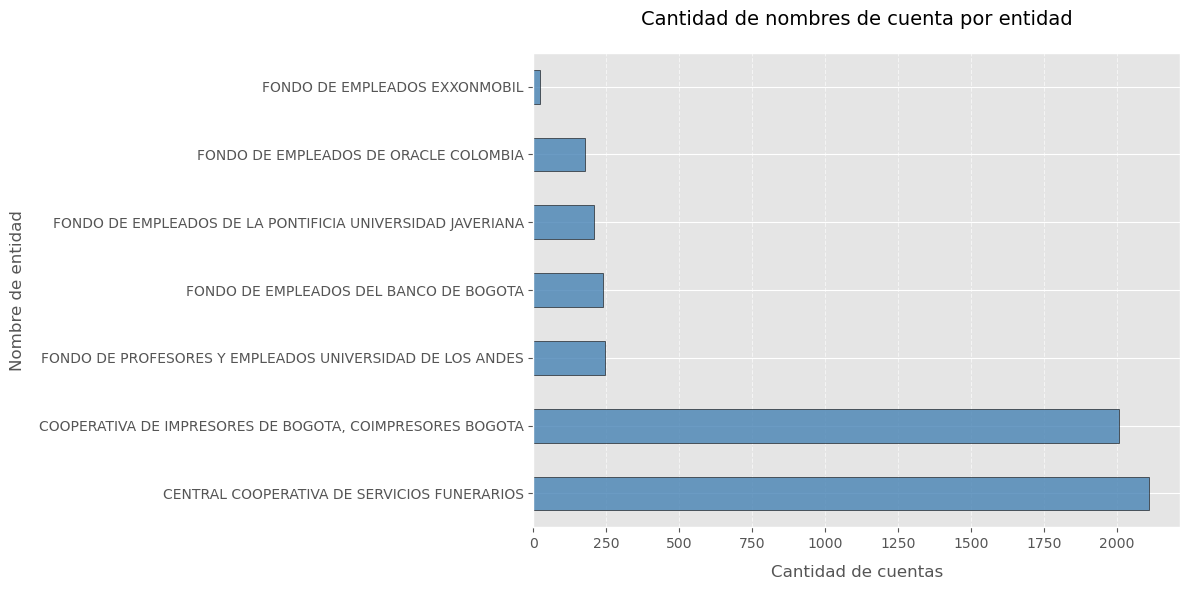

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
df = pd.read_csv("Libro1.csv")

# Renombrar columna: eliminar espacios alrededor del nombre para estandarizar
df.rename(columns=lambda x: x.strip(), inplace=True)

# Agrupar y contar (igual que antes)
cuentas_por_entidad = df.groupby("NOMBRE DE ENTIDAD")["NOMBRE CUENTA"].count().sort_values(ascending=False)

# Configurar el estilo del gráfico
plt.style.use('ggplot')  # Estilo diferente
plt.figure(figsize=(12, 6))

# Gráfico de barras horizontales
cuentas_por_entidad.plot(kind='barh',  # Barras horizontales
                         color='steelblue',  # Color diferente
                         edgecolor='black',  # Borde negro
                         alpha=0.8)  # Transparencia

# Personalización adicional
plt.title("Cantidad de nombres de cuenta por entidad", pad=20, fontsize=14)
plt.xlabel("Cantidad de cuentas", labelpad=10)
plt.ylabel("Nombre de entidad", labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()


In [28]:
#EL OBJETIVO DE ESTA Mostrar cómo cambia el valor total (en pesos) por código de renglón, para cada SIGLA, en un gráfico de líneas donde:
#Cada línea representa una SIGLA diferente
#El eje X representa los códigos de renglón
#El eje Y representa los valores en pesos

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\camil\AppData\Local\Temp\ipykernel_15484\770226275.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['VALOR EN PESOS'].astype(str).str.replace('[^\d.-]', '', regex=True),


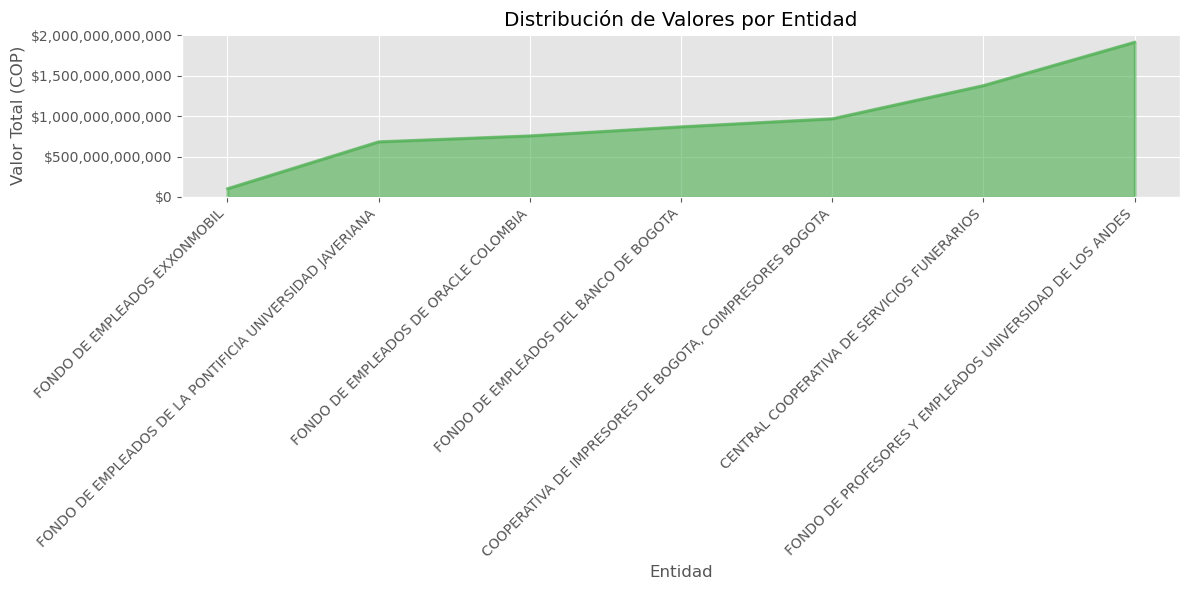

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar y procesar datos
df = pd.read_csv("Libro1.csv")
df['VALOR EN PESOS'] = pd.to_numeric(
    df['VALOR EN PESOS'].astype(str).str.replace('[^\d.-]', '', regex=True),
    errors='coerce'
).fillna(0)

# Gráfico de áreas
plt.figure(figsize=(12, 6))
df.groupby('NOMBRE DE ENTIDAD')['VALOR EN PESOS'].sum().sort_values().plot(
    kind='area',
    color='#4CAF50',  # Verde moderno
    alpha=0.6,
    linewidth=2,
    title='Distribución de Valores por Entidad',
    grid=True
)

# Personalización
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Valor Total (COP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')  # Formato monetario
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [32]:
#Procesar un archivo CSV llamado Libro1.csv 1ue contiene información económica (valores en pesos) asociada a diferentes entidades (SIGLAs), con el fin de:
#Limpiar correctamente los valores monetarios
#Agrupar los datos por entidad (SIGLA)
#Calcular estadísticas clave: suma, promedio, mediana, rango, desviación estándar y moda
#Preparar los datos para una visualización o análisis adicional.

C:\Users\camil\AppData\Local\Temp\ipykernel_15484\524370333.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


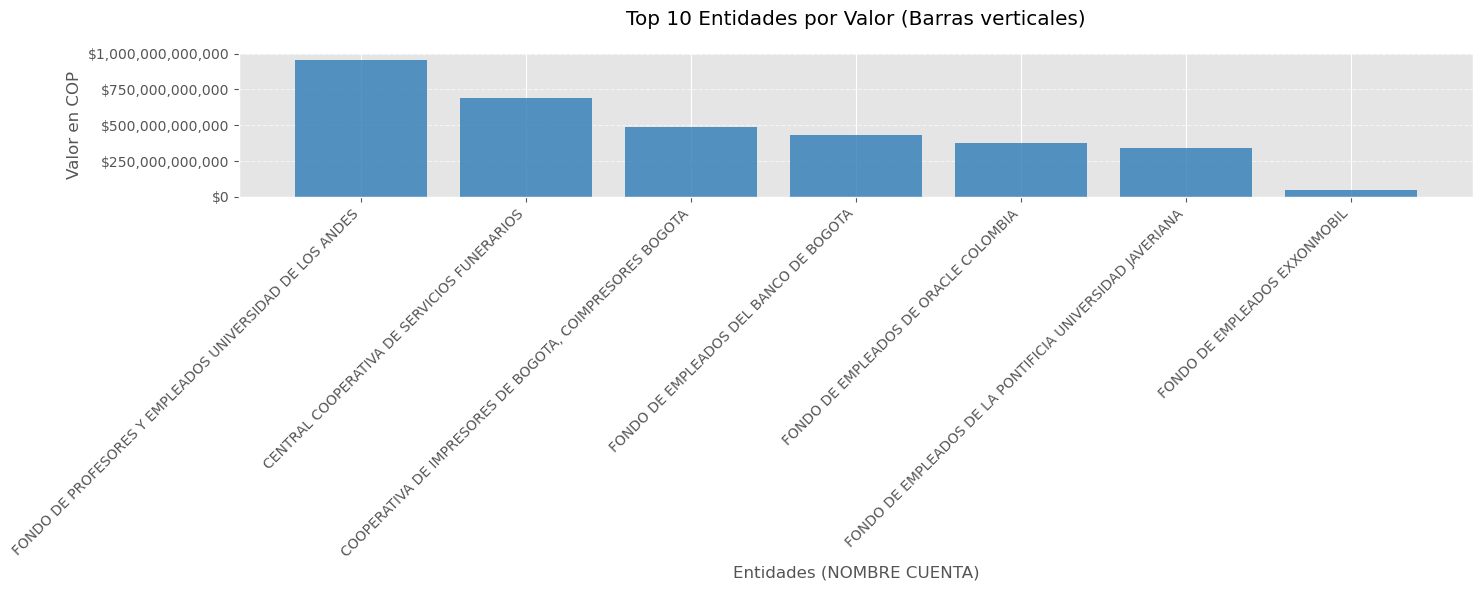

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar y limpiar datos
df = pd.read_csv("Libro1.csv")
df['VALOR EN PESOS'] = pd.to_numeric(
    df['VALOR EN PESOS'].astype(str)
    .str.replace(r'[^\d.-]', '', regex=True),
    errors='coerce'
).fillna(0)

# Preparar datos
datos = df.groupby('NOMBRE DE ENTIDAD')['VALOR EN PESOS'].sum().sort_values(ascending=False).head(10)

# Crear gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(datos.index, datos.values, color='#2c7bb6', alpha=0.8)

# Personalización
plt.title('Top 10 Entidades por Valor (Barras verticales)', pad=20)
plt.xlabel('Entidades (NOMBRE CUENTA)')
plt.ylabel('Valor en COP')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Formato de valores en eje Y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

In [36]:
#ESTA SIRVE PARA SAACAR EL PROMEDIO DE LOS VALORES EN PESOS CORRESPONDIENTE A LA SIGLA

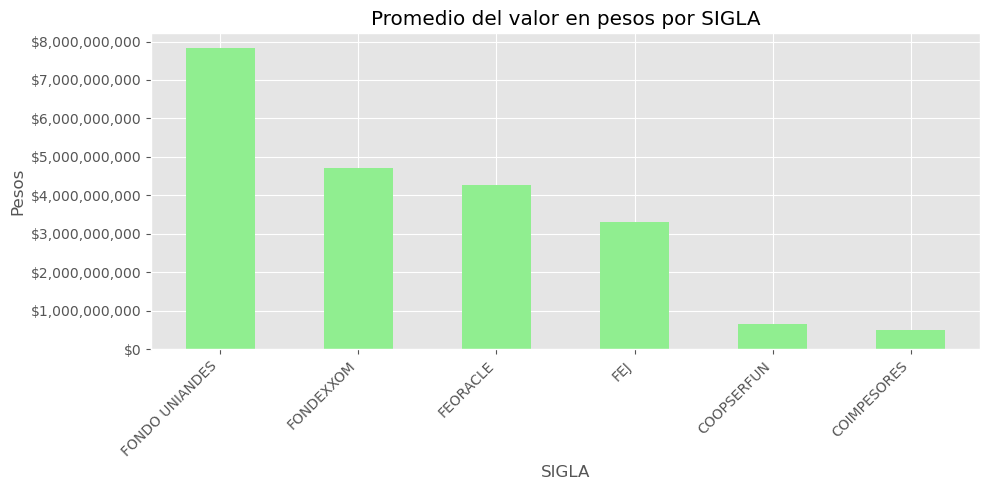

In [113]:
plt.figure(figsize=(10, 5))
promedio.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title("Promedio del valor en pesos por SIGLA")
plt.ylabel("Pesos")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_pesos))
plt.tight_layout()
plt.show()

In [40]:
#ESTA SIRVE PARA SACAR LA MEDIANA DEL VCALOR EN PESOS CORRESPONDIENTE A LA SIGLA

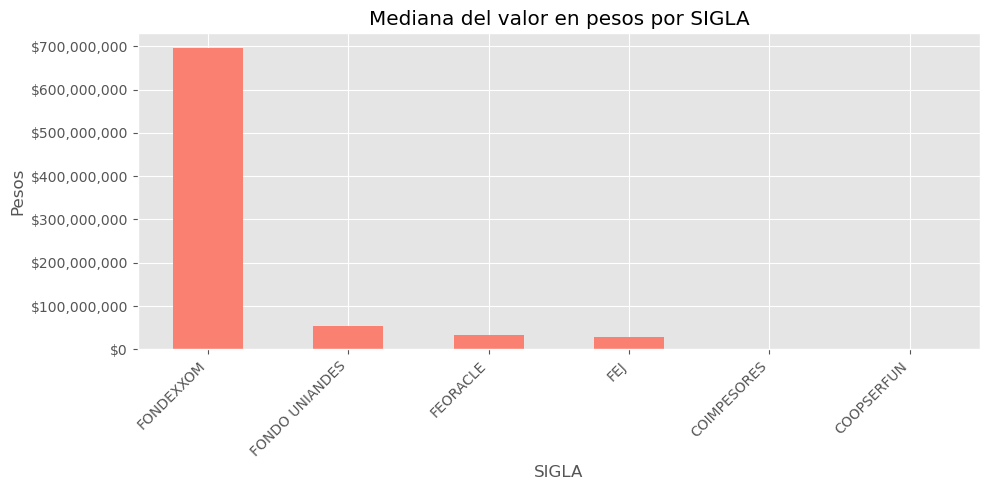

In [115]:
plt.figure(figsize=(10, 5))
mediana.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Mediana del valor en pesos por SIGLA")
plt.ylabel("Pesos")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_pesos))
plt.tight_layout()
plt.show()

In [117]:
#ESTA SIRVE PARA SACAR EL RANGO DEL VALOR EN PESOS CORRESPONDIENTE A LAA SIGLA

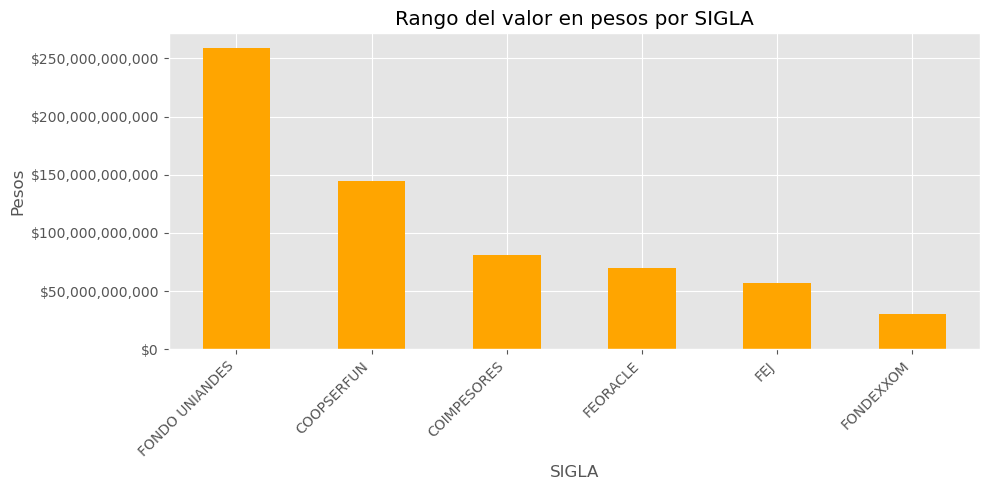

In [119]:
plt.figure(figsize=(10, 5))
rango.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Rango del valor en pesos por SIGLA")
plt.ylabel("Pesos")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_pesos))
plt.tight_layout()
plt.show()

In [121]:
#ESTA SIRVE PARA SACAR LA DESVIACION ESTANDAR DEL VALOR EN PESOS CORRESPONDIENTES A LA SIGLA

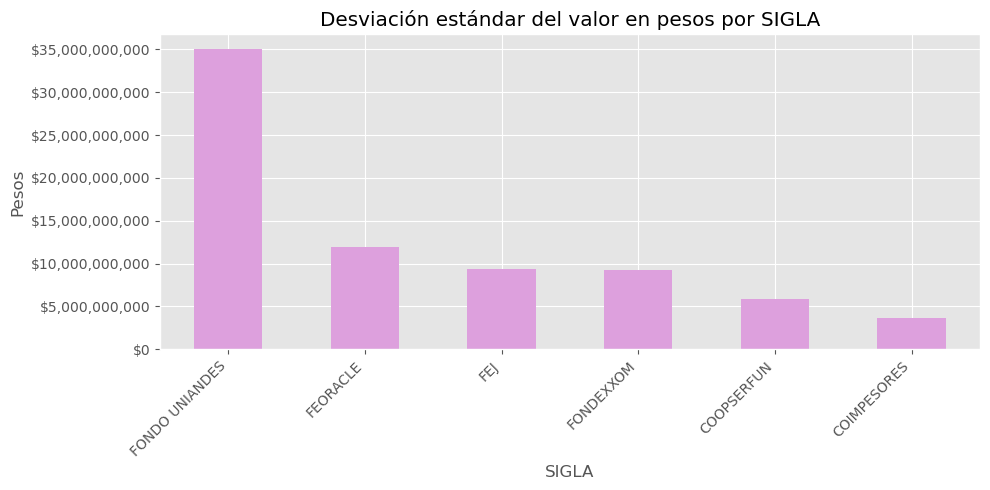

In [123]:
plt.figure(figsize=(10, 5))
desviacion.sort_values(ascending=False).plot(kind='bar', color='plum')
plt.title("Desviación estándar del valor en pesos por SIGLA")
plt.ylabel("Pesos")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_pesos))
plt.tight_layout()
plt.show()